파이썬 머신러닝 완벽가이드 ch7. 3~ 4 pg. 449~463

### **[개념 정리]📝**

---

### **03. 평균이동**

- 평균이동: K평균처럼 중심을 군집의 중심으로 지속적으로 움직이면서 군집화. 중심을 데이터가 모여있는 밀도가 높은 곳으로 이동(K평균은 평균 거리 중심)

- 데이터 분포도 이용, 즉 확률 밀도 함수 이용. 확률 밀도 함수가 피크인 점을(가장 데이터가 모여있는) 중심점으로 선정.
   - 확률 밀도 함수를 찾기 위해 KDE 이용
   - 주변 데이터와의 거리 값을 KDE 함수에 입력, 반환값을 현재 위치에서 반복적으로 업데이트 하면서 이동, 군집 중심점 찾음

   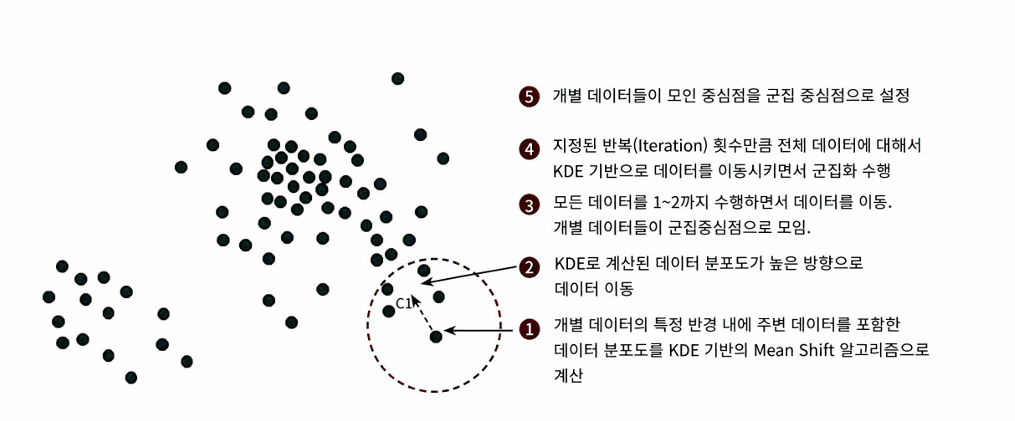

- **KDE**: 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법.
  - 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 테이터 건수로 나눠 함수 추정.
  - 대표 커널 함수: 가우시안 분포함수
  - 커널 함수식으로 표현됨: K(커널함수), x(확률 변숫값), xi(관측값), h(대역폭)

  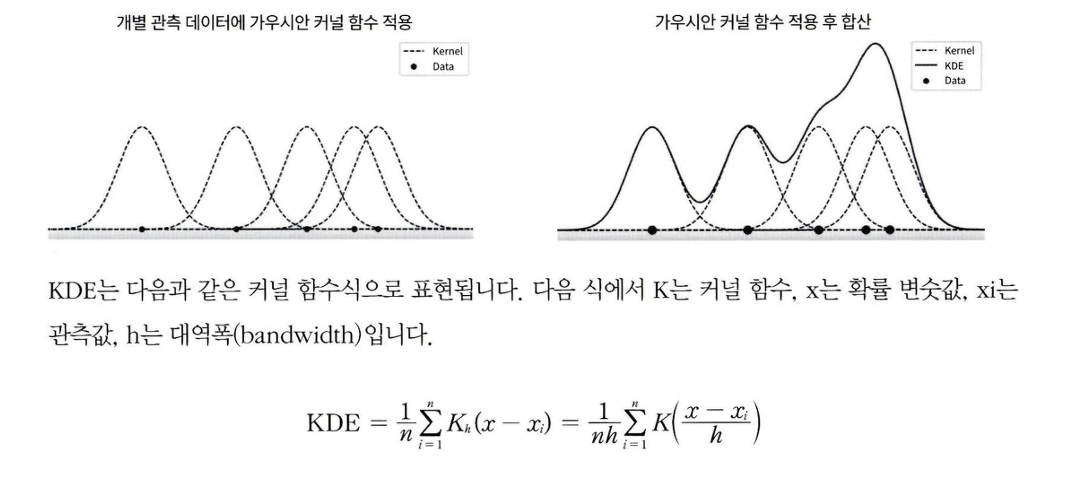
  - **대역폭(h)**은 KDE 형태를 부드러운 형태로 평활화하는데 적용. 확률 밀도 추정 성능을 좌우함.
    - h가 작으면 좁고 뾰족한 KDE > 큰 변동성으로 추정하므로 과적합 (많은 수의 군집 중심점)
    - h가 너무 크면 과도하게 평활화된 KDE > 지나친 단순화로 과소적합 (적은 수의 군집 중심점)

    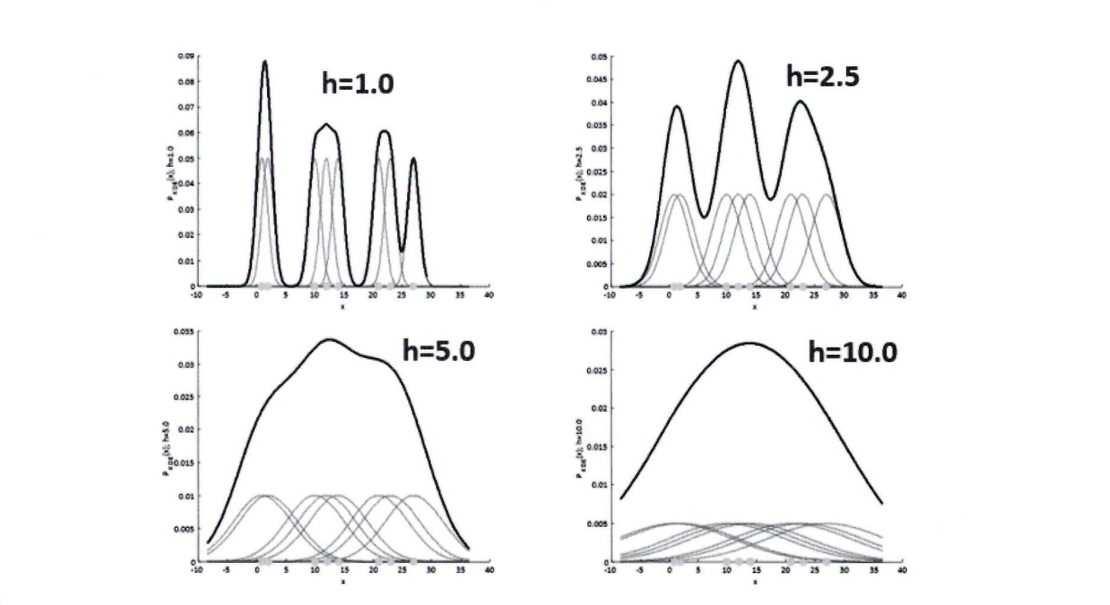

- **PDF**(확률 밀도 함수): 확률변수의 분포를 나타냄. 특정 변수가 어떤 값을 갖게 될 확률을 알 수 있음 > 변수의 특성 알수 있음


- 군집 개수 지정하지 않고 대역폭의 크기에 따라 군집화 수행
- 평균이동 군집화: MeanShift(bandwidth=h)
  - 대역폭 크기 설정
  - 대역폭의 크기가 군집화 품질에 큰 영향을 미치므로 estimate_bandwidth()으로 최적의 대역폭 계산
- 장점: 데이터 세트를 특정 형태나 분포도 기반 모델로 가정하지 않으므로 유연한 군집화 가능, 이상치 영향력이 적음. 미리 군집 개수 정할 필요 없음
- 단점: 수행 시간 오래 걸림. bandwidth크기에 영향을 많이 받음

---

### **04. GMM(Gaussian Mixture Model)**

- GMM 군집화: 군집화하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정으로 군집화 수행
  - 가우시안 분포: 정규분포. 좌우대칭형의 연속 확률 함수. (평균이 0이고 표준편차가 1인 정규분포= 표준정규분포)
  - 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 확률 분포 곡선 구겅이므로 이에 기반해 군집화 수행
  - 여러 개의 개별 정규 분포 곡선 추출 > 개별 데이터가 속하는 분포 결정
  - 확률 기반 군집화

- 모수 추정:
  - 1. 개별 정규 분포의 평균과 분산
    2. 각 데이터가 어떤 정규분포에 해당되는지의 확률
  - EM 방법 적용

  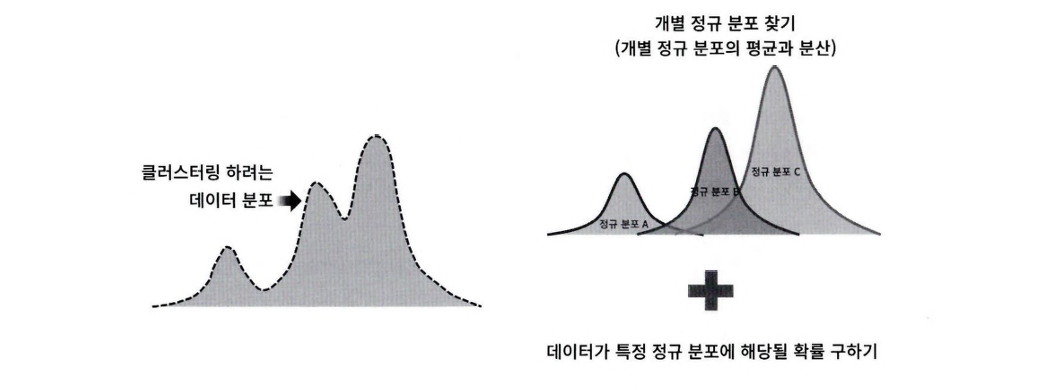

- GaussianMixture(n_components=n)
   - n_components: gaussian mixture 모델의 총 개수. 군집의 개수를 정하는데 중요한 역할

- GMM과 K평균 비교
  - K평균:
    - 원형의 범위에서 군집화 수행, cluster_std를 작게 설정해 데이터를 뭉치게 하면 효과적으로 군집화 가능.
    - 데이터가 원형이 아닌 타원형 범위일 경우 군집화 수행 어려움
    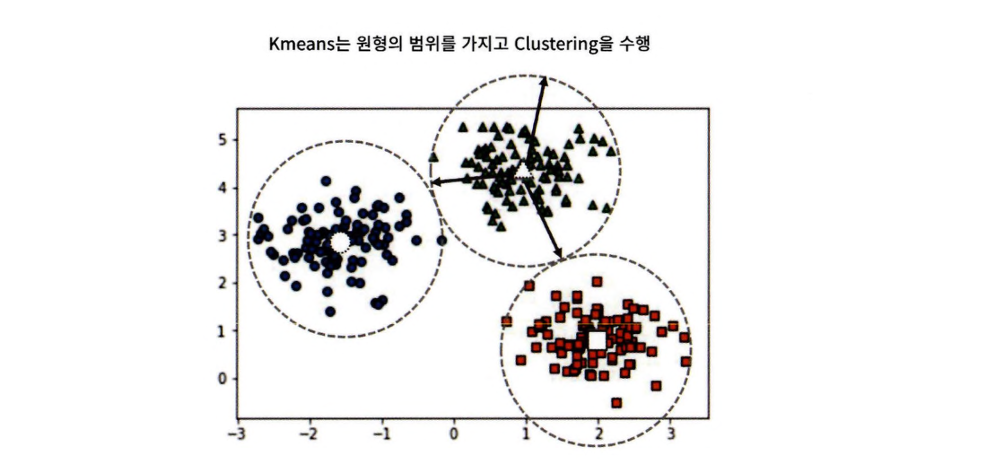


 - GMM:
     - 데이터가 분포된 방향에 따라 군집화 가능. 타원형 데이터도 잘 군집화함.
     - K평균보다 유연하게 적용 가능, 수행시간이 오래걸림





   
  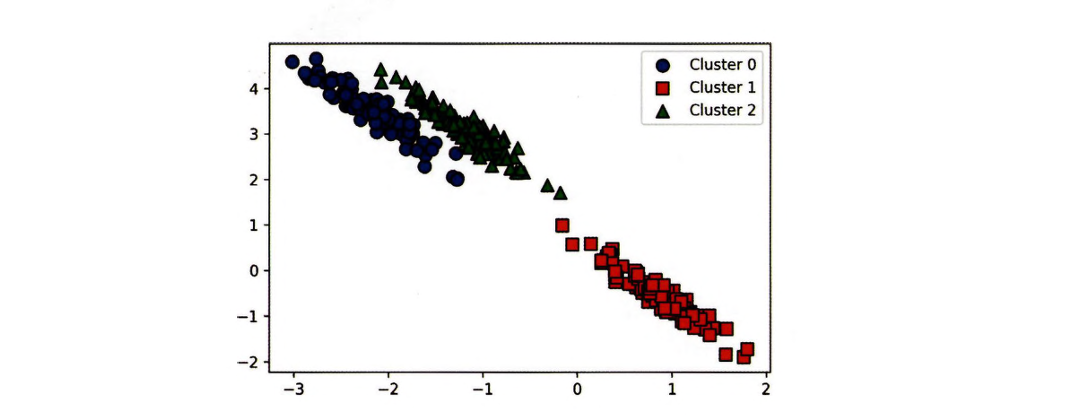

### **[코드필사]📝**

- 평균 이동

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
# bandwidth 작게 할수록 군집 개수가 많아짐
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [4]:
# bandwidth 최적화 값 찾기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [5]:
# 최적화 값 적용해 다시 군집화 수행
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


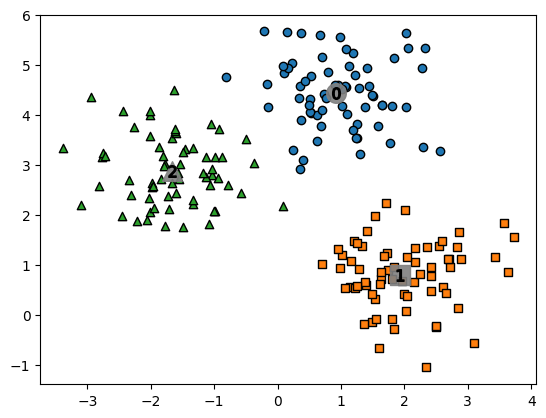

In [6]:
# 구성된 3개의 군집 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x = center_x_y[0], y=center_x_y[1], s=200, color='gray',
              alpha=0.9, marker=markers[label])
  plt.scatter(x = center_x_y[0], y=center_x_y[1], s=70, color='k',edgecolor='k',
              marker='$%d$' %label)

plt.show()

In [7]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


- GMM 이용한 붓꽃 데이터 세트 군집화

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 편리한 데이터 핸들링을 위해 DaraFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target'] = iris.target

# target값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


- GMM과 K평균 비교

In [13]:
# 군집 수행 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

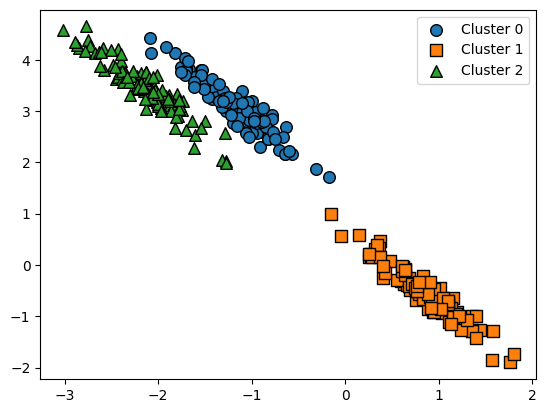

In [14]:
# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std = 0.5를 만듦.
X, y  = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target',iscenter=False)

<ipython-input-13-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


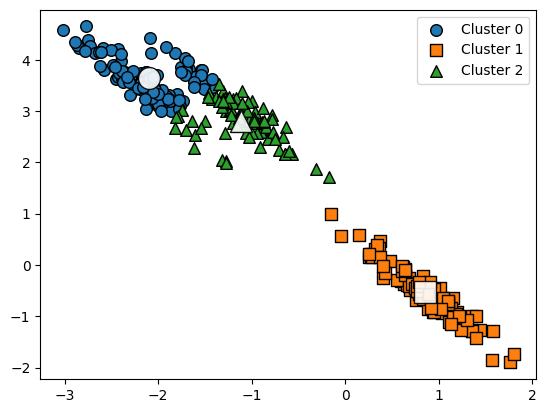

In [15]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

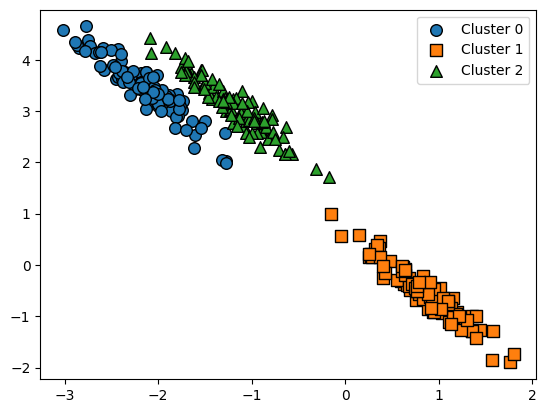

In [18]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [19]:
# make_blobs()의 타겟값과 KMeans, GMM의 군집 label비교해 군집화 효율 차이 발생 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
